Unzip datasets and prepare data:

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from multi_imbalance.datasets import load_datasets
from multi_imbalance.resampling.scut import SCUT
from multi_imbalance.utils.data import construct_flat_2pc_df

%matplotlib inline
sns.set_style("darkgrid")

%matplotlib inline
sns.set_style("darkgrid")

dataset = load_datasets()["new_ecoli"]

X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])

[[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
 [0.07 0.4  0.48 0.5  0.54 0.35 0.44]
 [0.56 0.4  0.48 0.5  0.49 0.37 0.46]
 [0.59 0.49 0.48 0.5  0.52 0.45 0.36]
 [0.23 0.32 0.48 0.5  0.55 0.25 0.35]]
[0 0 0 0 0]


In [2]:
Counter(dataset.target)

Counter({0: 145, 1: 77, 2: 37, 3: 25, 4: 52})

Resample data using SCUT algorithm

In [2]:
clf = SCUT()
resampled_X, resampled_y = clf.fit_resample(X, y)

Compare results by plotting data in 2 dimensions

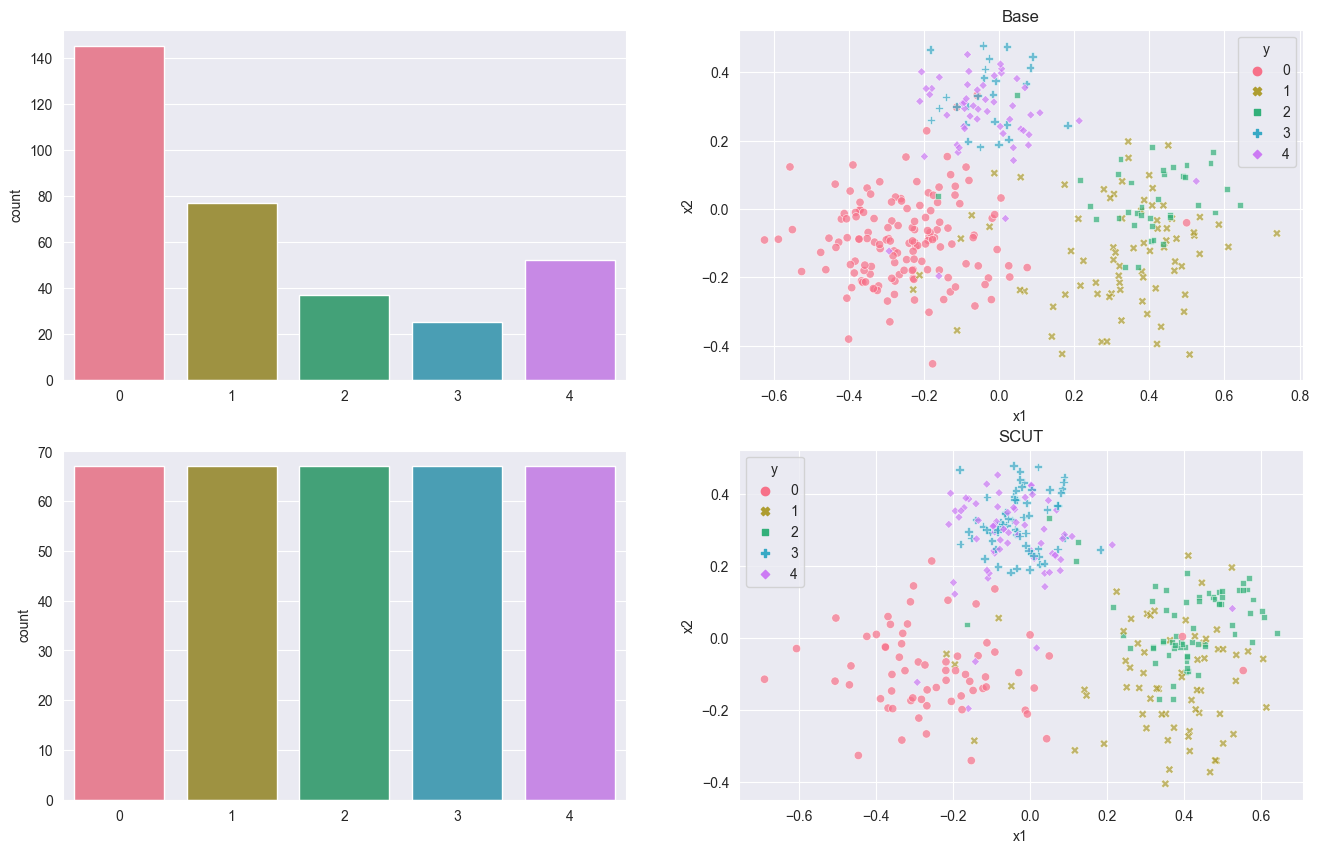

In [4]:
n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(x=y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[1],
    legend="full",
    palette=p,
)


axs[3].set_title("SCUT")
sns.countplot(x=resampled_y, ax=axs[2], palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[3],
    legend="full",
    palette=p,
)


### Pipeline example

In [6]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

dataset = load_datasets()["new_ecoli"]

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
pipeline = Pipeline([("scaler", StandardScaler()), ("scut", SCUT()), ("knn", KNN())])
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.77      0.53      0.62        19
           2       0.47      0.70      0.56        10
           3       0.86      1.00      0.92         6
           4       1.00      0.92      0.96        13

    accuracy                           0.85        84
   macro avg       0.81      0.83      0.81        84
weighted avg       0.86      0.85      0.85        84



In [8]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

dataset = load_datasets()["new_ecoli"]

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNN())])
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.75      0.63      0.69        19
           2       0.45      0.50      0.48        10
           3       1.00      1.00      1.00         6
           4       1.00      0.92      0.96        13

    accuracy                           0.85        84
   macro avg       0.83      0.81      0.82        84
weighted avg       0.85      0.85      0.84        84

